In [51]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [52]:
random.randrange(-1, 2, 2)

1

In [53]:
subplot(1,6,1)
train_data1 = np.ones((5,5))
train_data1[0:5, ::4] = -1
train_data1[1, 1::2] = -1
train_data1[2, ::2] = -1
imshow(train_data1, interpolation='nearest', cmap='bone')

In [54]:
subplot(1,6,2)
train_data2 = np.ones((5,5))
train_data2[0, 2] = -1
train_data2[1, 1::2] = -1
train_data2[2:5, ::4] = -1
train_data2[3] = -1
imshow(train_data2, interpolation='nearest', cmap='bone')

In [55]:
subplot(1,6,3)
train_data3 = np.ones((5,5))
train_data3[0] = -1
train_data3[1:5, 2] = -1
imshow(train_data3, interpolation='nearest', cmap='bone')

In [56]:
subplot(1,6,4)
train_data4 = np.ones((5,5))
train_data4[0:5, ::3] = -1
train_data4[2, :4] = -1
imshow(train_data4, interpolation='nearest', cmap='bone')

In [57]:
subplot(1,6,5)
train_data5 = np.ones((5,5))
train_data5[::2] = -1
train_data5[0, 4] = 1
train_data5[1, 0] = -1
train_data5[3, 4] = -1
imshow(train_data5, interpolation='nearest', cmap='bone')

In [58]:
subplot(1,6,6)
train_data6 = np.ones((5,5))
train_data6[0:3, 1] = -1
train_data6[4, 1] = -1
imshow(train_data6, interpolation='nearest', cmap='bone')

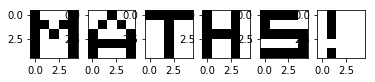

In [59]:
show()